### Import libraries, set seed for reproducibility

In [1]:
%%capture
import os
import random
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
def fix_seeds(seed=0):
  SEED = seed
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(SEED)
  np.random.seed(SEED)
  torch.manual_seed(SEED)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False
  if (torch.cuda.is_available()):
    torch.cuda.manual_seed(SEED)

fix_seeds()

### PyTorch official example

```python
m = nn.Dropout2d(p=0.2)
input = torch.randn(20, 16, 32, 32)
output = m(input)
```

### PyTorch feature demo

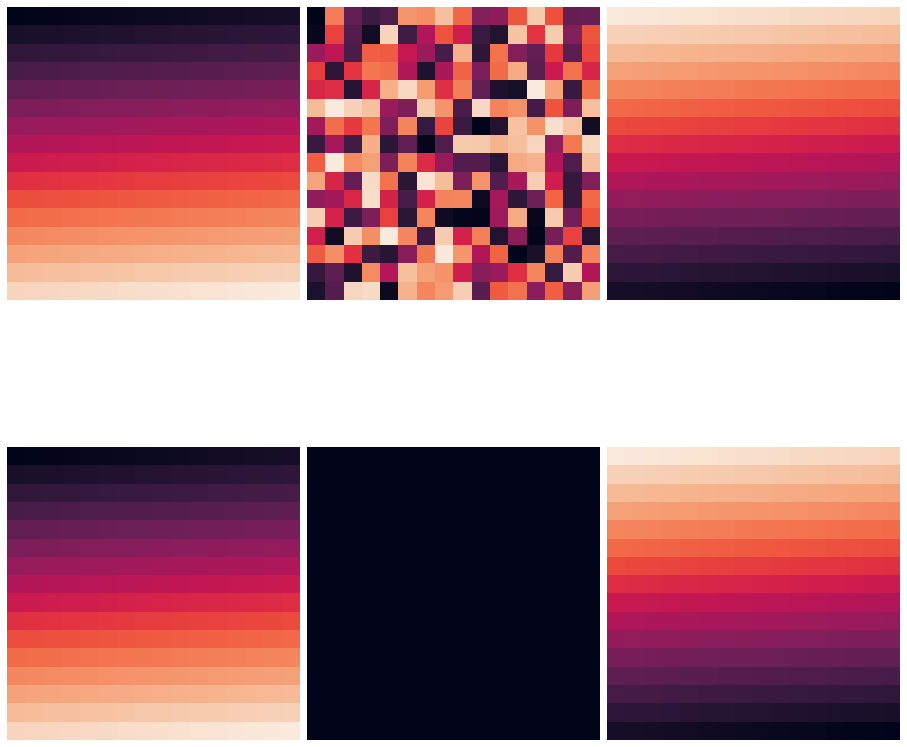

In [3]:
input = torch.rand([1, 3, 16, 16])
v = np.arange(1,16*16 + 1)
v = v.reshape(16,16)
w = np.arange(16*16+1, 1, -1)
w = w.reshape(16,16)
input[0][0] = torch.from_numpy(v)
input[0][2] = torch.from_numpy(w)  
spatial_dropout = nn.Dropout2d(p=0.3)
out = spatial_dropout(input) 

num_cols = 3
num_rows = 2
fig = plt.figure(figsize=(16,16))
input = input.squeeze()
out = out.squeeze()
for i in range(6):
  ax1 = fig.add_subplot(num_rows, num_cols, i+1)

  # visualise input channels in first row
  if 0 <= i <=2:
    temp = input[i].unsqueeze(0)
    temp = np.transpose(temp, (1,2,0))
    temp = temp.squeeze().numpy()
    ax1.imshow(temp)

  # visualise output channels in second row
  else:
    temp = out[i-3].unsqueeze(0)
    temp = np.transpose(temp, (1,2,0))
    temp = temp.squeeze().numpy()
    ax1.imshow(temp)
  ax1.axis('off')
  ax1.set_xticklabels([])
  ax1.set_yticklabels([])

plt.subplots_adjust(wspace=0.025, hspace=0.025)
fig.show()
fig.savefig('1.png', dpi=100,  bbox_inches='tight')

### Ilustrate difference from plain old Dropout

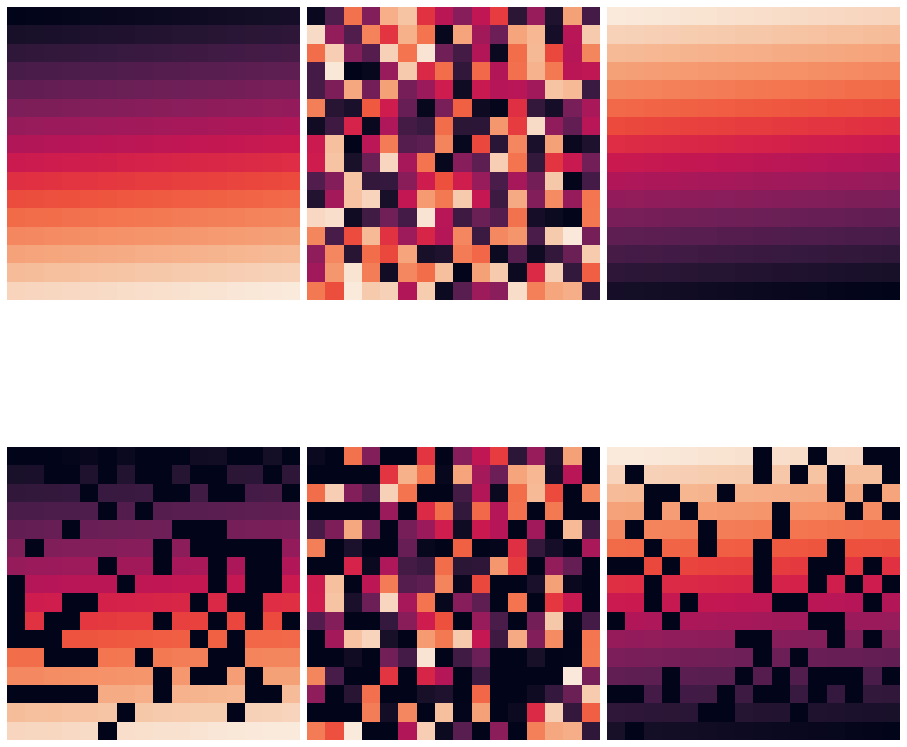

In [4]:
input = torch.rand([1, 3, 16, 16])
v = np.arange(1,16*16 + 1)
v = v.reshape(16,16)
w = np.arange(16*16+1, 1, -1)
w = w.reshape(16,16)
input[0][0] = torch.from_numpy(v)
input[0][2] = torch.from_numpy(w)  
spatial_dropout = nn.Dropout(p=0.3)
out = spatial_dropout(input) 

num_cols = 3
num_rows = 2
fig = plt.figure(figsize=(16,16))
input = input.squeeze()
out = out.squeeze()
for i in range(6):
  ax1 = fig.add_subplot(num_rows, num_cols, i+1)

  # visualise input channels in first row
  if 0 <= i <=2:
    temp = input[i].unsqueeze(0)
    temp = np.transpose(temp, (1,2,0))
    temp = temp.squeeze().numpy()
    ax1.imshow(temp)

  # visualise output channels in second row
  else:
    temp = out[i-3].unsqueeze(0)
    temp = np.transpose(temp, (1,2,0))
    temp = temp.squeeze().numpy()
    ax1.imshow(temp)
  ax1.axis('off')
  ax1.set_xticklabels([])
  ax1.set_yticklabels([])

plt.subplots_adjust(wspace=0.025, hspace=0.025)
fig.show()
fig.savefig('2.png', dpi=100,  bbox_inches='tight')